# Timeseries analysis of John F. Kennedy Airport Departures Overlayed with COVID-19 Case Counts

## Analytical Roadmap:

The overall objective of this analysis is to determine whether there is any relationship between the cumulative COVID-19 case count observed in 2020 and 2021 and the departure volume at JFK airport in NYC. 

- Import required data
- Convert fields to required types (e.g., datetime for dates)
- Establish baseline annual departure profile in non-COVID years (2017, 2018, 2019)
- Overlay COVID-19 cumulative case count on departure volume
- Visually assess any relationships between new case counts and departure volume
- Quantitify relationship if possible (e.g., reduction in 30-day moving average departures as case counts increase)

## Data sources:

- JFK departure data filtered for American Airlines between 2017 and 2021: https://www.transtats.bts.gov/ONTIME/Departures.aspx
- COVID-19 case counts in New York City (source: NYC DOHMH): https://github.com/nychealth/coronavirus-data/blob/master/trends/data-by-day.csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
%ls

Detailed_Statistics_Departures.csv  covid19-JFK-analysis/
JFK_covid_analysis.ipynb            data-by-day.csv
JFK_covid_analysis.py


### Importing required data

In [3]:
#importing departure data for American Airlines
df_jfkdeps = pd.read_csv('Detailed_Statistics_Departures.csv',header=6)

In [4]:
df_jfkdeps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carrier Code           67548 non-null  object 
 1   Date (MM/DD/YYYY)      67547 non-null  object 
 2   Flight Number          67547 non-null  float64
 3   Tail Number            67298 non-null  object 
 4   Destination Airport    67547 non-null  object 
 5   Actual departure time  67547 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [5]:
df_jfkdeps.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Actual departure time
0,AA,01/01/2017,1.0,N787AA,LAX,08:31
1,AA,01/01/2017,9.0,N794AA,SFO,06:56
2,AA,01/01/2017,15.0,N785AA,SFO,08:24
3,AA,01/01/2017,19.0,N790AA,LAX,08:56
4,AA,01/01/2017,21.0,N783AA,LAX,19:22


In [6]:
df_jfkdeps.tail()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Actual departure time
67543,AA,12/31/2021,2772.0,N316PF,AUS,18:28
67544,AA,12/31/2021,2813.0,N946AN,AUS,07:57
67545,AA,12/31/2021,2819.0,N336RU,ORD,07:45
67546,AA,12/31/2021,2829.0,N303RG,PHX,13:26
67547,SOURCE: Bureau of Transportation Statistics,NaN,NaN,NaN,NaN,NaN


In [7]:
df_jfkdeps.drop(df_jfkdeps.tail(1).index,inplace=True)

In [8]:
# importing NYC case counts since March 2020
df_case_count = pd.read_csv('data-by-day.csv')

In [9]:
df_case_count.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_case_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date_of_interest                 770 non-null    object
 1   CASE_COUNT                       770 non-null    int64 
 2   PROBABLE_CASE_COUNT              770 non-null    int64 
 3   HOSPITALIZED_COUNT               770 non-null    int64 
 4   DEATH_COUNT                      770 non-null    int64 
 5   PROBABLE_DEATH_COUNT             770 non-null    int64 
 6   CASE_COUNT_7DAY_AVG              770 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG          770 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG              770 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG             770 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG         770 non-null    int64 
 11  BX_CASE_COUNT                    770 non-null    int64 
 12  BX_PROBABLE_CASE_COUNT           770

### Convert fields to required types (e.g., datetime for dates)

In [11]:
#renaming date columns in both datasets to DATE
df_jfkdeps = df_jfkdeps.rename(columns={'Date (MM/DD/YYYY)':'DATE'})
df_case_count = df_case_count.rename(columns={'date_of_interest':'DATE'})

#convert DATE fields in both dataframes to datetime
df_jfkdeps.DATE = pd.to_datetime(df_jfkdeps.DATE)
df_case_count.DATE = pd.to_datetime(df_case_count.DATE)

### Establish baseline annual departure profile in non-COVID years (2017, 2018, 2019)

<AxesSubplot:xlabel='DATE'>

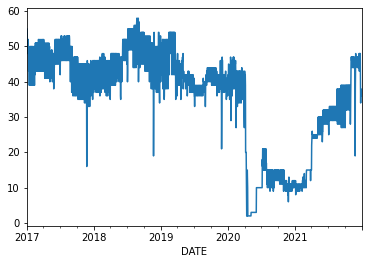

In [12]:
(df_jfkdeps.
    set_index('DATE').
    resample('D').
    size().
    plot())

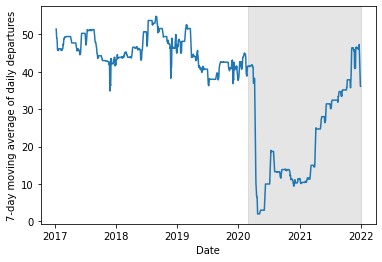

In [13]:
#since above plot is quite granular, replot with a moving 7-day average of daily departures


plt.plot(df_jfkdeps.
    set_index('DATE').
    resample('D').
    size().
    rolling(7).
    mean())

# define a shaded region to highlight timing of COVID-19
x1 = df_case_count.DATE[0]
x2 = df_jfkdeps.DATE[67546]
plt.axvspan(x1, x2, color='grey',alpha=0.2)

#label axes and show plot
plt.xlabel('Date')
plt.ylabel('7-day moving average of daily departures')
plt.show()


From above we can conclude that COVID-19 had an appreciable impact on daily flight volume for American Airlines, a major carrier with domestic and international operations. 

## Overlay COVID-19 cumulative case count on departure volume

In [14]:
# first merge the two datasets to have the cumulative total daily 
# case count aligned to the date fields in the departure data

df_combined = pd.merge(df_jfkdeps.
    set_index('DATE').
    resample('D').
    size().
    rolling(7).
    mean().reset_index(),
    df_case_count[['DATE','CASE_COUNT']],
    left_on='DATE',
    right_on='DATE',
    how='left'
                      )

df_combined
#now have a dataset that has total cumulative case count by date, 
# along with our rolling average measure of daily departures

,DATE,0,CASE_COUNT
0,2017-01-01,NaN,NaN
1,2017-01-02,NaN,NaN
2,2017-01-03,NaN,NaN
3,2017-01-04,NaN,NaN
4,2017-01-05,NaN,NaN
...,...,...,...
1821,2021-12-27,41.428571,51149.0
1822,2021-12-28,39.714286,49389.0
1823,2021-12-29,38.000000,50356.0
1824,2021-12-30,36.285714,47083.0


## Visually assess any relationships between new case counts and departure volume


In [15]:
df_combined = df_combined.rename(columns={0:'DEPS'})
df_combined

,DATE,DEPS,CASE_COUNT
0,2017-01-01,NaN,NaN
1,2017-01-02,NaN,NaN
2,2017-01-03,NaN,NaN
3,2017-01-04,NaN,NaN
4,2017-01-05,NaN,NaN
...,...,...,...
1821,2021-12-27,41.428571,51149.0
1822,2021-12-28,39.714286,49389.0
1823,2021-12-29,38.000000,50356.0
1824,2021-12-30,36.285714,47083.0


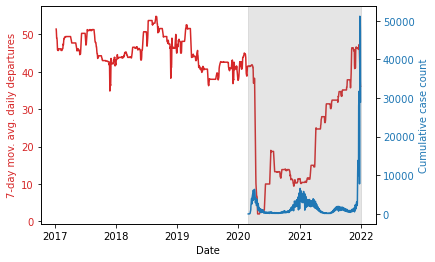

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('7-day mov. avg. daily departures', color=color)
ax1.plot(df_combined.DATE, df_combined.DEPS, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative case count', color=color)  # we already handled the x-label with ax1
ax2.plot(df_combined.DATE, df_combined.CASE_COUNT, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# define a shaded region to highlight timing of COVID-19
x1 = df_case_count.DATE[0]
x2 = df_jfkdeps.DATE[67546]
plt.axvspan(x1, x2, color='grey',alpha=0.2)

plt.show()

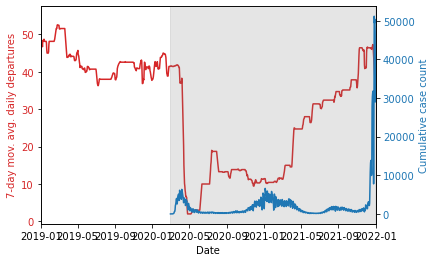

In [17]:
#shorten the range of the data to better see the trends

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('7-day mov. avg. daily departures', color=color)
ax1.plot(df_combined.DATE, df_combined.DEPS, color=color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() #plots a second set of axes on the same chart 

color = 'tab:blue'
ax2.set_ylabel('Cumulative case count', color=color)  
ax2.plot(df_combined.DATE, df_combined.CASE_COUNT, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# define a shaded region to highlight timing of COVID-19
x1 = df_case_count.DATE[0]
x2 = df_jfkdeps.DATE[67546]
plt.axvspan(x1, x2, color='grey',alpha=0.2)

plt.xlim([dt.date(2019,1,1),dt.date(2022,1,1)])
plt.show()

From the above we can see a precipitous drop in the 7-day moving average departure volume that coincided with the initial rise in cases that occured in March 2020. Surprisingly, this drop more or less coincided with the rise in case count (i.e., there was relatively minimal lag between case counts and departure volume decreasing. A further interesting point is the sustained drop in departure volume in the run up to the 2020/2021 holiday season (likely a result of the Delta variant). Lastly, it is interesting to note that at the end of the data series (i.e. 2021/2022 holiday season) case counts have dramatically spiked without an attendant drop in flights. This is partially because we are not seeing the 2022 data, but is likely also related to the relaxation of containment measures.

## Quantitify relationship if possible (e.g., reduction in 7-day moving average departures as case counts increase)

Given the above data it is interesting to see whether during the depths of the pandemic there was a direct relationship between upticks in case counts and a corresponding reduction in flight volume. I would hypothesize the answer to this question to be yes until more recent history in which case counts have skyrocketed due to lax containment measures (people aren't getting sick anymore due to vaccines and the health system can tolerate a higher case count with fewer hospitalizations). 

First we need a parameter that measures the week-on-week variation in case counts and flight volume. 

In [18]:
#create a merged dataframe that includes both case count and departure data

df_combined2 = pd.merge(df_jfkdeps.
    set_index('DATE').
    resample('D').
    size().
    reset_index(),
    df_case_count[['DATE','CASE_COUNT']],
    left_on='DATE',
    right_on='DATE',
    how='inner'
                      )

df_combined2 = df_combined2.rename(columns={0:'DAILY_DEPS'})

In [19]:
#create a dataframe that groups the case count and departure data by year and week of year
df_agg = df_combined2.groupby(
    [df_combined2.DATE.dt.isocalendar().year
     ,df_combined2.DATE.dt.isocalendar().week]).agg(
    SUM_DAILY_DEPS = ('DAILY_DEPS','sum'),
    AVG_CASE_COUNT = ('CASE_COUNT','mean')
)


In [20]:
#below gives us week over week percentage variation in case count and departure volume
df_agg.pct_change()

SUM_DAILY_DEPS  AVG_CASE_COUNT
year week                                
2020 9                NaN             NaN
     10          2.815789       11.857143
     11          0.003448       64.133333
     12          0.006873        5.986012
     13         -0.017065        0.472065
...                   ...             ...
2021 48          0.128472        0.644649
     49          0.000000        0.503548
     50         -0.006154        2.987849
     51         -0.065015        1.134698
     52         -0.400662        0.874404

[97 rows x 2 columns]

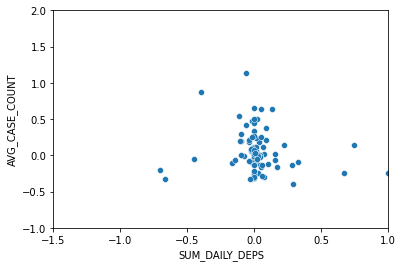

In [21]:
#plot a scatter to visually inspect the relationship between % change in case count and % change in departure volume

fig, ax = plt.subplots()

data = df_agg.pct_change()[['SUM_DAILY_DEPS','AVG_CASE_COUNT']]

sns.scatterplot(x = df_agg.pct_change().SUM_DAILY_DEPS,y=df_agg.pct_change().AVG_CASE_COUNT, ax=ax)
ax.set_xlim(-1.5,1)
ax.set_ylim(-1,2)
plt.show()

From the above chart it is hard to see any obvious relationship between the average week-over-week case counts and change in % of departures week over week. We can validate whether this is the case quantitatively using a regression:

In [22]:
import statsmodels.api as sm

In [23]:
x = df_agg.pct_change().AVG_CASE_COUNT[1:] #using the 1: slide to omit the NaN value at the beginning of the dataset
x = sm.add_constant(x)
y = df_agg.pct_change().SUM_DAILY_DEPS[1:]
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SUM_DAILY_DEPS   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.631
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.205
Time:                        21:48:25   Log-Likelihood:                -34.055
No. Observations:                  96   AIC:                             72.11
Df Residuals:                      94   BIC:                             77.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0403      0.036      1.120      0.265      -0.031       0.112
AVG_CASE_COUNT     0.0069      0.005      1.277      0.205      -0.004       0.018
==============================================================================
Omnibus:                      140.556   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5945.562
Skew:                           5.070   Prob(JB):                         0.00
Kurtosis:                      40.196   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above regression indicates an R-squared value of 0.017 and the coefficient for is not significant at the 95% level. This tells us the model has low explanatory power and suggests that some other factor likely explained the variation in departure volume than case counts. We know intuitively that government policy and consumer demand were key drivers of flight volume during the pandemic, these results don't prove that out, but DO show that there is a limited direct relationship between case counts and departure volume. Perhaps the initial reaction to the pandemic was to cause flight volume to plummet, but subsequent waves of infections didn't result in the same precipitous declines as those observed in March 2020. 